Import the needed libraries for data visualisation

In [1]:
import lux
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
print("Setup Complete")

Setup Complete


Import the data from the tsv file with pandas

In [2]:
file_path = "/home/apprenant/simplon_projects/foodflix/data/01_raw/en.openfoodfacts.org.products.tsv"
df = pd.read_csv(file_path, sep='\t')

/home/apprenant/simplon_projects/foodflix/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Looking at the shape of the data : how many lines and how many columns

In [3]:
df.shape

(356027, 163)

In [4]:
percent_of_nans = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

In [5]:
useless_features = percent_of_nans[percent_of_nans > 98].index
useless_features

Index(['water-hardness_100g', 'nutrition_grade_uk', '-nervonic-acid_100g',
       '-erucic-acid_100g', '-mead-acid_100g', '-elaidic-acid_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', 'no_nutriments',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', 'chlorophyl_100g',
       '-melissic-acid_100g', 'glycemic-index_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g', '-caprylic-acid_100g', '-montanic-acid_100g',
       '-myristic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g',
       '-maltose_100g', 'nucleotides_100g', '-arachidonic-acid_100g',
       '-maltodextrins_100g', '-oleic-acid_100g', '-gondoic-acid_100g',
       'serum-proteins_100g', 'molybdenum_100g', 'allergens_en',
       'chromium_100g', 'omega-9-fat_100g',
       '-dihomo-gamma-linolenic-acid_100g', '-behenic-acid_100g', 'cities',
       '-gamma-linolenic-acid_100g', '-arachidic-acid_100g', 'casein_100g',
       '-glu

In [6]:
clean_df = df.drop(columns=useless_features)
clean_df

/home/apprenant/simplon_projects/foodflix/env/lib/python3.8/site-packages/lux/executor/PandasExecutor.py:250: UserWarning:
Lux detects that the attribute 'last_modified_t' maybe contain mixed type.
To visualize this attribute, you may want to convert the 'last_modified_t' into a uniform type as follows:
	df['last_modified_t'] = df['last_modified_t'].astype(str)
/home/apprenant/simplon_projects/foodflix/env/lib/python3.8/site-packages/lux/executor/PandasExecutor.py:250: UserWarning:
Lux detects that the attribute 'created_t' maybe contain mixed type.
To visualize this attribute, you may want to convert the 'created_t' into a uniform type as follows:
	df['created_t'] = df['created_t'].astype(str)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:>

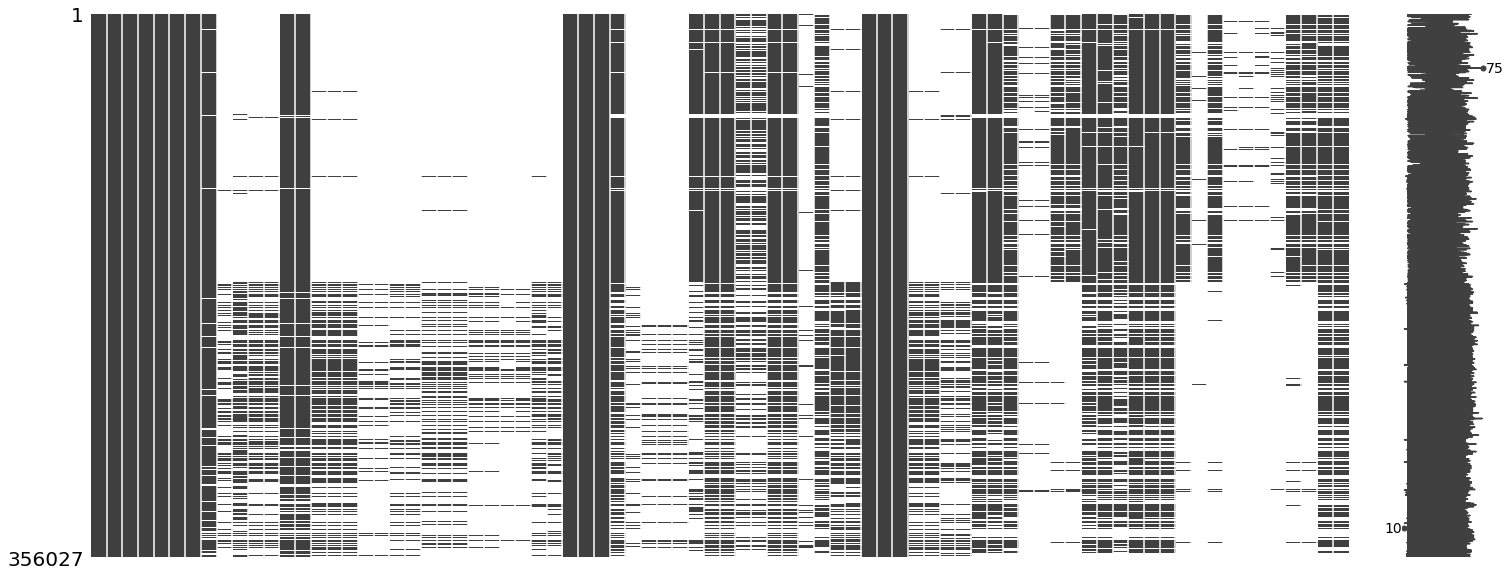

In [7]:
msno.matrix(clean_df)

In [8]:
list(clean_df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_category_en',
 'image_url',
 'image_sm

In [9]:
clean_df.shape

(356027, 80)

In [10]:
df

In [11]:
clean_df = clean_df[
['product_name',
 'brands',
 'ingredients_text',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']
]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
clean_df

Saved HTML to /home/apprenant/simplon_projects/foodflix/results/1st.html


In [14]:
clean_df.save_as_html('/home/apprenant/simplon_projects/foodflix/results/1st.html')

In [13]:
clean_df.shape

(356027, 12)

In [15]:
clean_df = clean_df.dropna(subset= [
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g'],how ='all')

(296812, 12)

In [16]:
clean_df.shape

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [23]:
clean_df

/home/apprenant/simplon_projects/foodflix/env/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Lux can not operate on an empty dataframe.
Please check your input again.



Empty DataFrame
Columns: [product_name, brands, ingredients_text, nutrition_grade_fr, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g]
Index: []

In [22]:
energy_outliers = clean_df.loc[clean_df['energy_100g'] > 3800]
energy_outliers

/home/apprenant/simplon_projects/foodflix/env/lib/python3.8/site-packages/pandas/core/generic.py:4156: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
clean_df.drop(energy_outliers.index, axis=0, inplace=True)


(296480, 12)

In [25]:
clean_df.shape

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
fat_outliers = clean_df.loc[clean_df['fat_100g'] > 100]
fat_outliers

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
clean_df.drop(fat_outliers.index, axis=0)
